In [8]:
import datasets
ds = datasets.load_dataset('simplescaling/s1K-1.1')
ds = ds['train'].train_test_split(0.1)
ds

DatasetDict({
    train: Dataset({
        features: ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt'],
        num_rows: 900
    })
    test: Dataset({
        features: ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt'],
        num_rows: 100
    })
})

In [14]:
import os
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B')

def get_len(x):
    return len(tokenizer(x)['input_ids'])

def map_fn(x):
    # x['length'] = get_len(x['completion'])
    x['length'] = get_len(x['deepseek_thinking_trajectory']) + get_len(x['deepseek_attempt'])
    return x

ds = ds.map(map_fn, num_proc=os.cpu_count())

Map (num_proc=24): 100%|██████████| 900/900 [00:01<00:00, 551.67 examples/s]


Map (num_proc=24): 100%|██████████| 100/100 [00:00<00:00, 284.15 examples/s]


In [15]:
!pip install pandas matplotlib seaborn

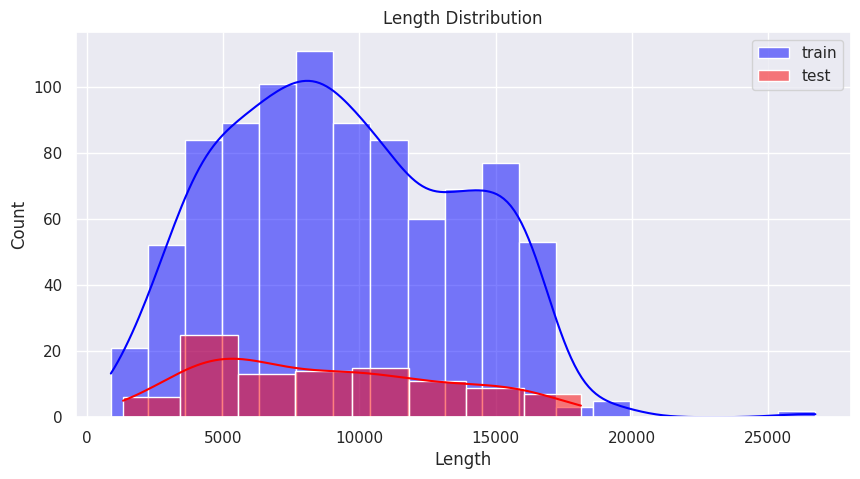

In [16]:
all_train_lengths = [x['length'] for x in ds['train']]
all_test_lengths = [x['length'] for x in ds['test']]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
sns.histplot(all_train_lengths, color='blue', label='train', kde=True)
sns.histplot(all_test_lengths, color='red', label='test', kde=True)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [17]:
print('Stats')
print('Train')
print('  Min:', min(all_train_lengths))
print('  Max:', max(all_train_lengths))
print('  Mean:', sum(all_train_lengths) / len(all_train_lengths))
print('  Median:', sorted(all_train_lengths)[len(all_train_lengths) // 2])

print('Test')
print('  Min:', min(all_test_lengths))
print('  Max:', max(all_test_lengths))
print('  Mean:', sum(all_test_lengths) / len(all_test_lengths))
print('  Median:', sorted(all_test_lengths)[len(all_test_lengths) // 2])


Stats
Train
  Min: 890
  Max: 26731
  Mean: 9364.843333333334
  Median: 8936
Test
  Min: 1338
  Max: 18130
  Mean: 8851.95
  Median: 8079
